<a href="https://colab.research.google.com/github/krish-gdp/headers/blob/main/mushroom_classification_using_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/data/mushrooms.csv')

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [10]:
# lets perform some explorative data analysis

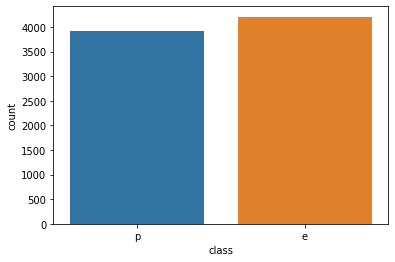

In [12]:
sns.countplot(data = df, x = 'class')

In [13]:
# so the data is nearly balanced.
#lets check if there is any dat amissing in the given data set.

In [24]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [25]:
#therefore none of the data is missing.

In [26]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [27]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [30]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


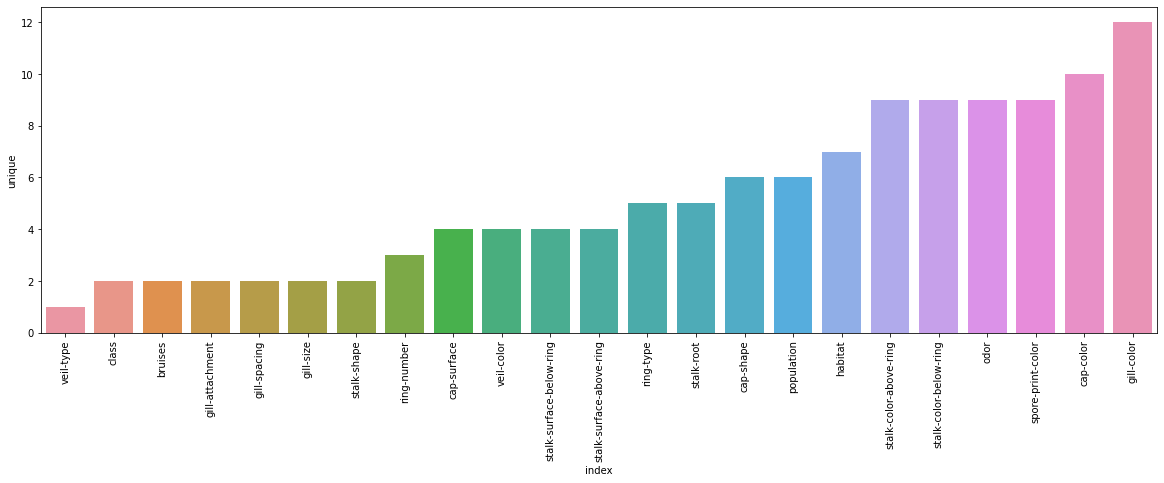

In [37]:
plt.figure(figsize = (20,6))
sns.barplot(data = df.describe().transpose().reset_index().sort_values('unique'), x = 'index',y = 'unique')
plt.xticks(rotation =90);


In [39]:
X = df.drop('class',axis=1)
y = df['class']

In [40]:
from sklearn.model_selection import train_test_split


In [46]:
X = pd.get_dummies(X, drop_first=True)

In [47]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15 , random_state= 101)

In [48]:
# we perform the data on different classification algorithms to see which give sthe best result.


In [63]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


random forest classification


In [50]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 10 ,max_features= 'auto', max_depth = 5,random_state = 101)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)


In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
y_pred1

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [53]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           e       0.97      1.00      0.99       655
           p       1.00      0.97      0.98       564

    accuracy                           0.99      1219
   macro avg       0.99      0.98      0.99      1219
weighted avg       0.99      0.99      0.99      1219



In [81]:
print(confusion_matrix(y_test,y_pred1))

[[655   0]
 [ 18 546]]


In [59]:
model1.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.34347215e-03,
       0.00000000e+00, 6.25192038e-05, 1.29721454e-03, 3.36009085e-03,
       0.00000000e+00, 8.67286339e-03, 7.54321697e-04, 0.00000000e+00,
       8.98781443e-04, 5.59800396e-04, 0.00000000e+00, 3.05308404e-03,
       1.34336049e-02, 4.57897384e-02, 1.08993294e-02, 5.52749712e-02,
       1.36963393e-03, 0.00000000e+00, 9.62288177e-02, 2.56740626e-02,
       1.60490744e-02, 7.08139175e-04, 0.00000000e+00, 6.00661344e-02,
       9.52697686e-02, 7.62063543e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.36363307e-03, 0.00000000e+00, 6.73887988e-05, 0.00000000e+00,
       8.10484441e-03, 1.25364397e-03, 1.51697049e-02, 2.93349876e-02,
       0.00000000e+00, 1.42331563e-01, 2.53041317e-02, 8.08637319e-04,
       2.25610286e-03, 5.02430101e-02, 2.66364543e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.03074881e-02, 4.54012456e-03,
      

In [80]:
model1.feature_importances_.argmax()

45

In [62]:
X.columns[45]

'stalk-surface-above-ring_k'

In [64]:
# lets perform logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model2 = LogisticRegression()

In [71]:
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred2 = model2.predict(X_test)

In [73]:
y_pred2

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [74]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [75]:
print(confusion_matrix(y_test,y_pred2))

[[655   0]
 [  0 564]]


In [ ]:
# this model has achieved a  100 percent accuracy .


In [82]:
# lets perform using adaboost technique

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
model3 = AdaBoostClassifier(n_estimators = 1)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [86]:
print(confusion_matrix(y_test,y_pred3))

[[529 126]
 [ 23 541]]


In [88]:
model3.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
model3.feature_importances_.argmax()

22

In [90]:
X.columns[22]

'odor_n'

In [87]:
# let perform hyprparameter tuning to improve th eperformance of thed adaboost clasifier 

In [93]:
error = []
for n in range(1,50):
  model = AdaBoostClassifier(n_estimators = n)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  err = 1 - accuracy_score(y_pred ,y_test)
  error.append(err)




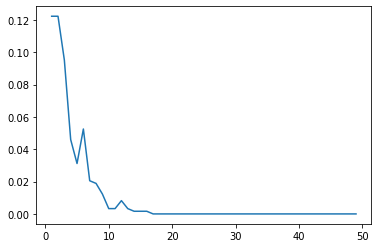

In [94]:
plt.plot(range(1,50),error)

In [95]:
#here error is minimum at the value 18
#lets take n = 18

In [96]:
model4 = AdaBoostClassifier(n_estimators = 18)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [98]:
print(confusion_matrix(y_test,y_pred4))

[[655   0]
 [  0 564]]


In [99]:
model.feature_importances_.argmax()

82

In [100]:
X.columns[82]

'spore-print-color_w'

In [101]:
# we are getting the best accuracy using logistic regression and using adaboost technique when nthe no of estimators are equal to 18

In [ ]:
# Here different models are giving the importanv eto the differenr features to het the bets aaccuracy.